# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import time

In [2]:
import nltk
from nltk.stem.porter import PorterStemmer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Loading Data in JSON format

In [4]:
df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)

In [5]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [9]:
df.isnull().sum() #checking whether data contains a null value or not

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [10]:
df.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Cleaning the data

In [11]:
#retaining only alphabets from a-z and A-Z and rest everyone is converted to spaces
df['headline'] = df['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))

# Getting the features and Labels

In [12]:
X = df['headline']
Y = df['is_sarcastic']

In [13]:
X

0        former versace store clerk sues over secret  b...
1        the  roseanne  revival catches up to our thorn...
2        mom starting to fear son s web series closest ...
3        boehner just wants wife to listen  not come up...
4        j k  rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free fall
26705                              america s best    hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie     
Name: headline, Length: 26709, dtype: object

In [14]:
Y

0        0
1        0
2        1
3        1
4        0
        ..
26704    0
26705    0
26706    0
26707    0
26708    0
Name: is_sarcastic, Length: 26709, dtype: int64

# Stemming of the data

In [15]:
ps=PorterStemmer()

In [16]:
X = X.apply(lambda x: x.split())
X = X.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

# Vectorization of features using TF-IDF Vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
X = list(X)
X = tv.fit_transform(X).toarray()

In [19]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Split data into train and test

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# ML model-Linear SVM

In [30]:
LSC = LinearSVC()

In [31]:
LSC.fit(X_train, Y_train)
x11=LSC.score(X_train, Y_train)
x12=LSC.score(X_test, Y_test)

# ML model-Gaussian Naive Bayes

In [32]:
gnb = GaussianNB()

In [33]:
gnb.fit(X_train, Y_train)
x21=gnb.score(X_train, Y_train) 
x22=gnb.score(X_test, Y_test)

# ML model-Logistic Regression

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train, Y_train)
x31=lr.score(X_train, Y_train) 
x32=lr.score(X_test, Y_test)

# ML model-Random Forest Classifier

In [36]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)

In [37]:
rfc.fit(X_train, Y_train)
x41=rfc.score(X_train, Y_train) 
x42=rfc.score(X_test, Y_test)

# Plotting the data

In [38]:
data1 = {'SVM':x11, 'Gaussian Naive Bayes':x21, 'Logistic Regression':x31,'Random Forest Classifier':x41}

In [40]:
algos = list(data1.keys())
train_accuracy = list(data1.values())

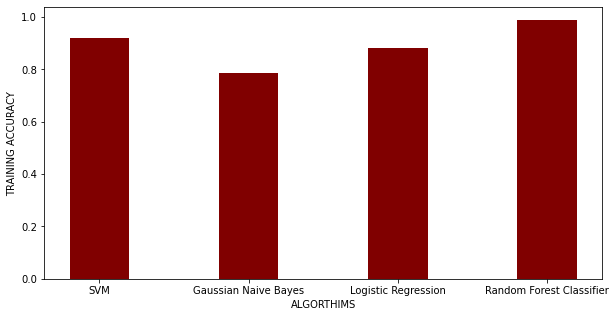

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 

plt.bar(algos, train_accuracy, color ='maroon',width = 0.4)
 
plt.xlabel("ALGORTHIMS")
plt.ylabel("TRAINING ACCURACY")
plt.show()

In [43]:
data2 = {'SVM':x12, 'Gaussian Naive Bayes':x22, 'Logistic Regression':x32,'Random Forest Classifier':x42}

In [46]:
algos = list(data2.keys())
test_accuracy = list(data2.values())

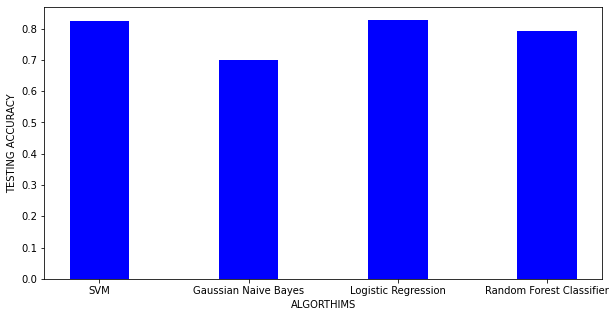

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 

plt.bar(algos, test_accuracy, color ='blue',width = 0.4)
 
plt.xlabel("ALGORTHIMS")
plt.ylabel("TESTING ACCURACY")
plt.show()